## Exercise 1 — One-Component Signal

### Original Signal

The continuous-time signal is:

x(t) = 5 cos(2π · 1000 · t)

The frequency spectrum contains two components located at:

+1000 Hz and −1000 Hz

Each spectral line has a magnitude:

A / 2 = 2.5

---

### Sampling

The sampling frequency is:

fs = 8000 Hz

Sampling creates spectral replicas at frequencies given by:

n · fs ± f0 , where n is an integer

The replicas are visible in the frequency range:

−20 kHz to +20 kHz

---

### Shannon sampling theorem
The sampling frequency of the signal is:

2f0 = 2000 Hz

Since:

fs = 8000 Hz > 2f0 = 2000 Hz

No aliasing occurs


Exercise 1: One-Component Signal
Part (a): Original Signal Spectrum
Signal: x(t) = 5 cos(2π × 1000 × t)
Frequency components at: ±1000 Hz

Part (b): Sampled Signal Spectrum (-20 kHz to +20 kHz)
Sampling frequency: 8000 Hz


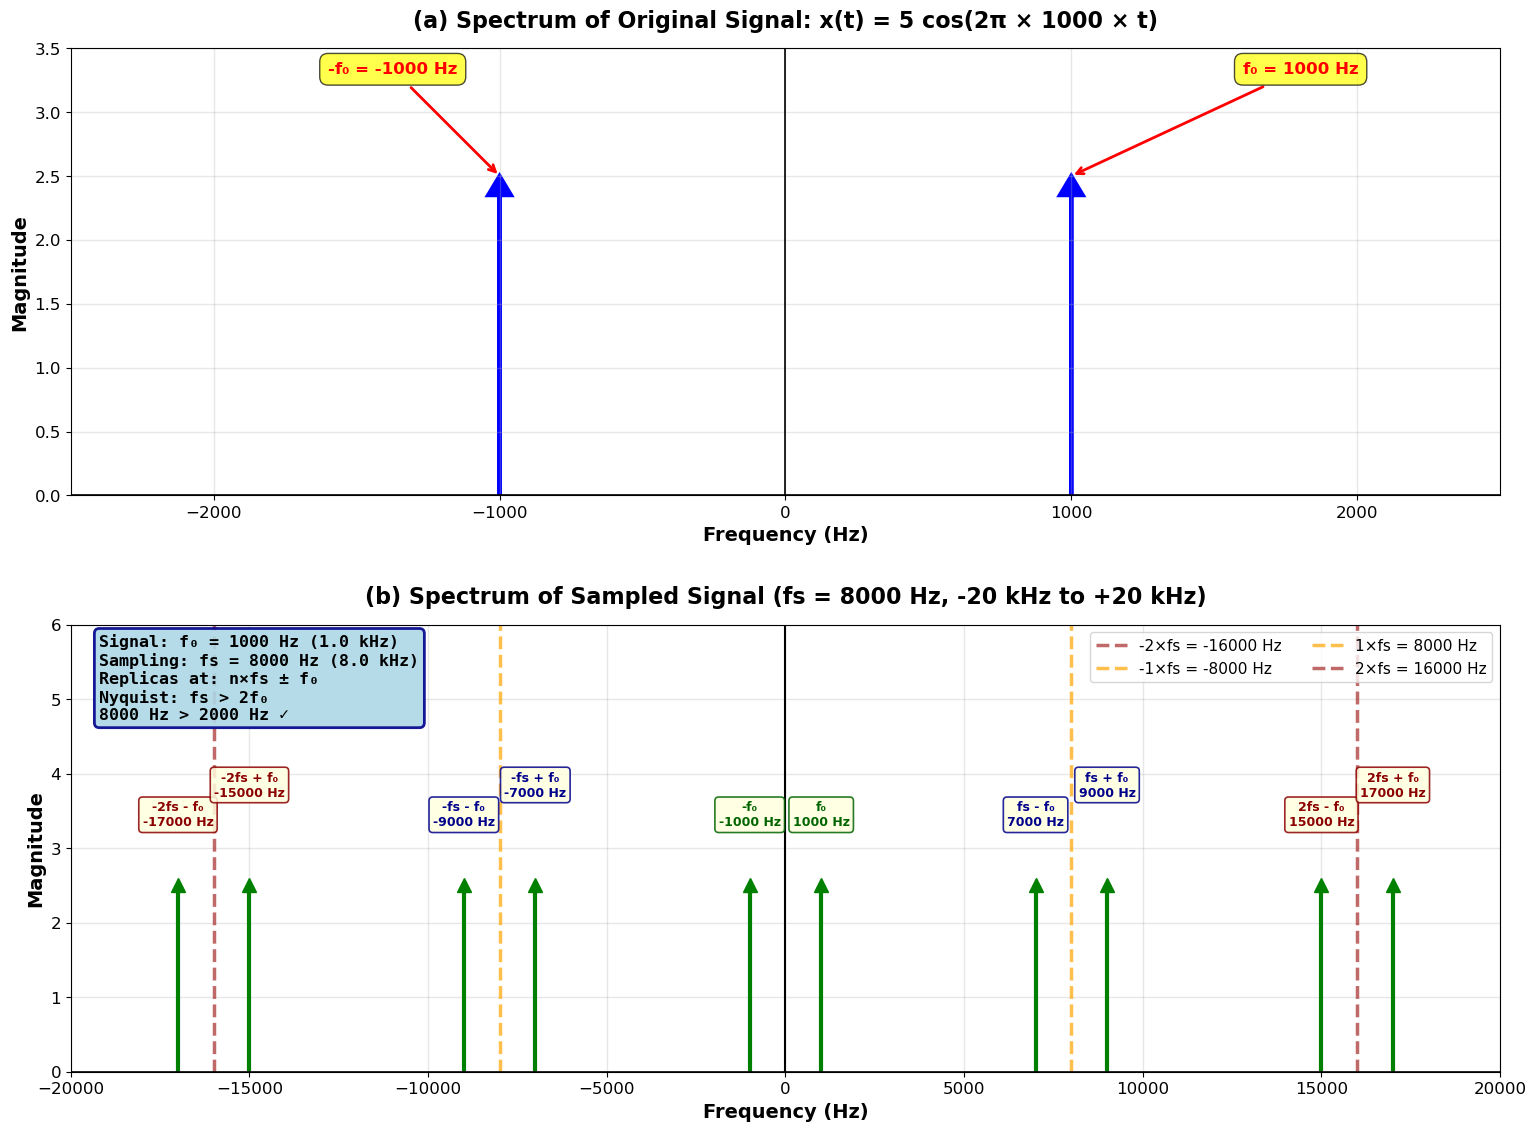


SUMMARY
Original signal: frequency components at ±1000 Hz

Sampling at fs = 8000 Hz creates replicas at:
Frequency (Hz)  |  Frequency (kHz)  |  Expression
----------------------------------------------------------------------
        -17000  |            -17.0  |  -2×fs - f₀
        -15000  |            -15.0  |  -2×fs + f₀
         -9000  |             -9.0  |  -1×fs - f₀
         -7000  |             -7.0  |  -1×fs + f₀
         -1000  |             -1.0  |  0×fs - f₀
          1000  |              1.0  |  0×fs + f₀
          7000  |              7.0  |  1×fs - f₀
          9000  |              9.0  |  1×fs + f₀
         15000  |             15.0  |  2×fs - f₀
         17000  |             17.0  |  2×fs + f₀

Multiples of fs: -16000 Hz, -8000 Hz, 0, 8000 Hz, 16000 Hz
Shannon sampling theorem: fs (8000 Hz) > 2×f₀ (2000 Hz) ✓
No aliasing occurs!


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f0 = 1000  # Signal frequency in Hz (1 kHz)
A = 5      # Amplitude
fs = 8000  # Sampling frequency in Hz (8 kHz)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# ========== Part (a): Spectrum of Original Signal ==========
print("Exercise 1: One-Component Signal")
print("Part (a): Original Signal Spectrum")
print(f"Signal: x(t) = {A} cos(2π × {f0} × t)")
print(f"Frequency components at: ±{f0} Hz\n")

# Plot original signal spectrum (both positive and negative frequencies)
freq_orig = [-f0, f0]
mag_orig = [A/2, A/2]

# Draw arrows 
for f, m in zip(freq_orig, mag_orig):
    ax1.arrow(
        f, 0,              # starting point (frequency, 0)
        0, m,              # vertical arrow of height = magnitude
        head_width=80,
        head_length=0.15,
        linewidth=3,
        color='blue',
        length_includes_head=True
    )

ax1.axvline(0, color='k', linestyle='-', linewidth=1.2)
ax1.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax1.set_xlim(-2500, 2500)
ax1.set_ylim(0, 3.5)
ax1.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax1.set_title('(a) Spectrum of Original Signal: x(t) = 5 cos(2π × 1000 × t)', 
              fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linewidth=1)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Add annotations
ax1.annotate(f'-f₀ = -{f0} Hz', xy=(-f0, A/2), xytext=(-f0-600, A/2+0.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2), 
             fontsize=12, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))
ax1.annotate(f'f₀ = {f0} Hz', xy=(f0, A/2), xytext=(f0+600, A/2+0.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2), 
             fontsize=12, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# ========== Part (b): Spectrum of Sampled Signal ==========
print("Part (b): Sampled Signal Spectrum (-20 kHz to +20 kHz)")
print(f"Sampling frequency: {fs} Hz")

# Calculate all replicas from -20 kHz to +20 kHz
# Replicas occur at: n*fs ± f0 for all integer n
replicas = []

# For each multiple of fs (both positive and negative)
for n in range(-2, 3):  # n = -2, -1, 0, 1, 2 to cover -20 to +20 kHz range
    # Replica at n*fs + f0
    freq_pos = n * fs + f0
    if -20000 <= freq_pos <= 20000:
        replicas.append(freq_pos)
    
    # Replica at n*fs - f0
    freq_neg = n * fs - f0
    if -20000 <= freq_neg <= 20000:
        replicas.append(freq_neg)

# Remove duplicates and sort
replicas = sorted(list(set(replicas)))

# Plot sampled signal spectrum
magnitudes = [A/2] * len(replicas)
# Draw spectral replicas as arrows
for f in replicas:
    ax2.vlines(f, 0, A/2, colors='green', linewidth=3)
    ax2.plot(f, A/2, marker='^', markersize=10, color='green')

# Add vertical reference lines at multiples of fs (both positive and negative)
colors = ['purple', 'orange', 'brown', 'cyan']
for n in [-2, -1, 1, 2]:
    if -20000 <= n * fs <= 20000:
        color = colors[abs(n) % len(colors)]
        ax2.axvline(n * fs, color=color, linestyle='--', 
                   linewidth=2.5, alpha=0.7, label=f'{n}×fs = {n * fs} Hz')

ax2.axvline(0, color='k', linestyle='-', linewidth=1.5)
ax2.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax2.set_xlim(-20000, 20000)
ax2.set_ylim(0, 6.0)
ax2.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax2.set_title(f'(b) Spectrum of Sampled Signal (fs = {fs} Hz, -20 kHz to +20 kHz)', 
              fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linewidth=1)
ax2.legend(loc='upper right', fontsize=11, ncol=2)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Add annotations for each replica with better visibility
annotation_height = [A/2 + 0.8, A/2 + 1.2, A/2 + 0.8, A/2 + 1.2, A/2 + 0.8, A/2 + 0.8, 
                     A/2 + 0.8, A/2 + 1.2, A/2 + 0.8, A/2 + 1.2, A/2 + 0.8]

for i, freq in enumerate(replicas):
    # Determine which replica this is
    if freq == f0:
        label = f'f₀\n{freq} Hz'
        color = 'darkgreen'
    elif freq == -f0:
        label = f'-f₀\n{freq} Hz'
        color = 'darkgreen'
    elif freq == fs - f0:
        label = f'fs - f₀\n{freq} Hz'
        color = 'darkblue'
    elif freq == fs + f0:
        label = f'fs + f₀\n{freq} Hz'
        color = 'darkblue'
    elif freq == -fs - f0:
        label = f'-fs - f₀\n{freq} Hz'
        color = 'darkblue'
    elif freq == -fs + f0:
        label = f'-fs + f₀\n{freq} Hz'
        color = 'darkblue'
    elif freq == 2*fs - f0:
        label = f'2fs - f₀\n{freq} Hz'
        color = 'darkred'
    elif freq == 2*fs + f0:
        label = f'2fs + f₀\n{freq} Hz'
        color = 'darkred'
    elif freq == -2*fs - f0:
        label = f'-2fs - f₀\n{freq} Hz'
        color = 'darkred'
    elif freq == -2*fs + f0:
        label = f'-2fs + f₀\n{freq} Hz'
        color = 'darkred'
    else:
        label = f'{freq} Hz'
        color = 'black'
    
    # Alternate heights to avoid overlap
    height = annotation_height[i] if i < len(annotation_height) else A/2 + 0.8
    
    ax2.annotate(label, xy=(freq, A/2), xytext=(freq, height),
                ha='center', fontsize=9, color=color, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', 
                         edgecolor=color, alpha=0.85, linewidth=1.2))

# Add text box with key information
textstr = f'Signal: f₀ = {f0} Hz ({f0/1000} kHz)\n'
textstr += f'Sampling: fs = {fs} Hz ({fs/1000} kHz)\n'
textstr += f'Replicas at: n×fs ± f₀\n'
textstr += f'Nyquist: fs > 2f₀\n'
textstr += f'{fs} Hz > {2*f0} Hz ✓'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9, 
             edgecolor='darkblue', linewidth=2)
ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=12,
         verticalalignment='top', bbox=props, family='monospace', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.08)
plt.savefig('signal_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== Summary ==========
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Original signal: frequency components at ±{f0} Hz")
print(f"\nSampling at fs = {fs} Hz creates replicas at:")
print("Frequency (Hz)  |  Frequency (kHz)  |  Expression")
print("-" * 70)
for freq in replicas:
    # Find the expression
    found = False
    for n in range(-2, 3):
        if freq == n * fs + f0:
            expr = f"{n}×fs + f₀"
            found = True
            break
        elif freq == n * fs - f0:
            expr = f"{n}×fs - f₀"
            found = True
            break
    if not found:
        expr = "?"
    print(f"{freq:14d}  |  {freq/1000:15.1f}  |  {expr}")

print(f"\nMultiples of fs: {-2*fs} Hz, {-fs} Hz, 0, {fs} Hz, {2*fs} Hz")
print(f"Shannon sampling theorem: fs ({fs} Hz) > 2×f₀ ({2*f0} Hz) ✓")
print("No aliasing occurs!")

## Exercise 2 — Two-Component Signal

### Original Signal

The continuous-time signal is:

x(t) = 5 cos(2π · 2000 · t) + 3 cos(2π · 3000 · t)

The signal contains two frequency components:

- f1 = ±2000 Hz
- f2 = ±3000 Hz

Each spectral line has the following magnitude:
- For f1: A1 / 2 = 2.5
- For f2: A2 / 2 = 1.5

---

### Sampling

The sampling frequency is:

fs = 8000 Hz

Sampling creates spectral replicas at frequencies given by:

n · fs ± f1  
n · fs ± f2  

The spectrum is observed in the range:

−20 kHz to +20 kHz

---

### Shannon sampling theorem

The maximum frequency of the signal is:

fmax = 3000 Hz

The Shannon sampling theorem is:

fs > 2 · fmax = 6000 Hz

Since:

fs = 8000 Hz > 6000 Hz

No aliasing occurs

---

### Ideal Low-Pass Filtering

An ideal low-pass filter is applied with cutoff frequency:

fc = 4000 Hz

The filter passband is:

−4000 Hz to +4000 Hz

---

### Recovered Signal Spectrum

After filtering, the following frequency components remain:

- ±2000 Hz
- ±3000 Hz

Both components lie inside the passband of the filter.

The original signal is perfectly recovered.


Exercise 2: Two-Component Signal
Signal: x(t) = 5 cos(2π × 2000 × t) + 3 cos(2π × 3000 × t)
Sampling frequency: 8000 Hz
Filter cutoff frequency: 4000 Hz

Part (a): Sampled Signal Spectrum (-20 kHz to +20 kHz)

Replicas of f₁ = 2000 Hz:
  -18000 Hz (-18.0 kHz)
  -14000 Hz (-14.0 kHz)
  -10000 Hz (-10.0 kHz)
  -6000 Hz (-6.0 kHz)
  -2000 Hz (-2.0 kHz)
  2000 Hz (2.0 kHz)
  6000 Hz (6.0 kHz)
  10000 Hz (10.0 kHz)
  14000 Hz (14.0 kHz)
  18000 Hz (18.0 kHz)

Replicas of f₂ = 3000 Hz:
  -19000 Hz (-19.0 kHz)
  -13000 Hz (-13.0 kHz)
  -11000 Hz (-11.0 kHz)
  -5000 Hz (-5.0 kHz)
  -3000 Hz (-3.0 kHz)
  3000 Hz (3.0 kHz)
  5000 Hz (5.0 kHz)
  11000 Hz (11.0 kHz)
  13000 Hz (13.0 kHz)
  19000 Hz (19.0 kHz)


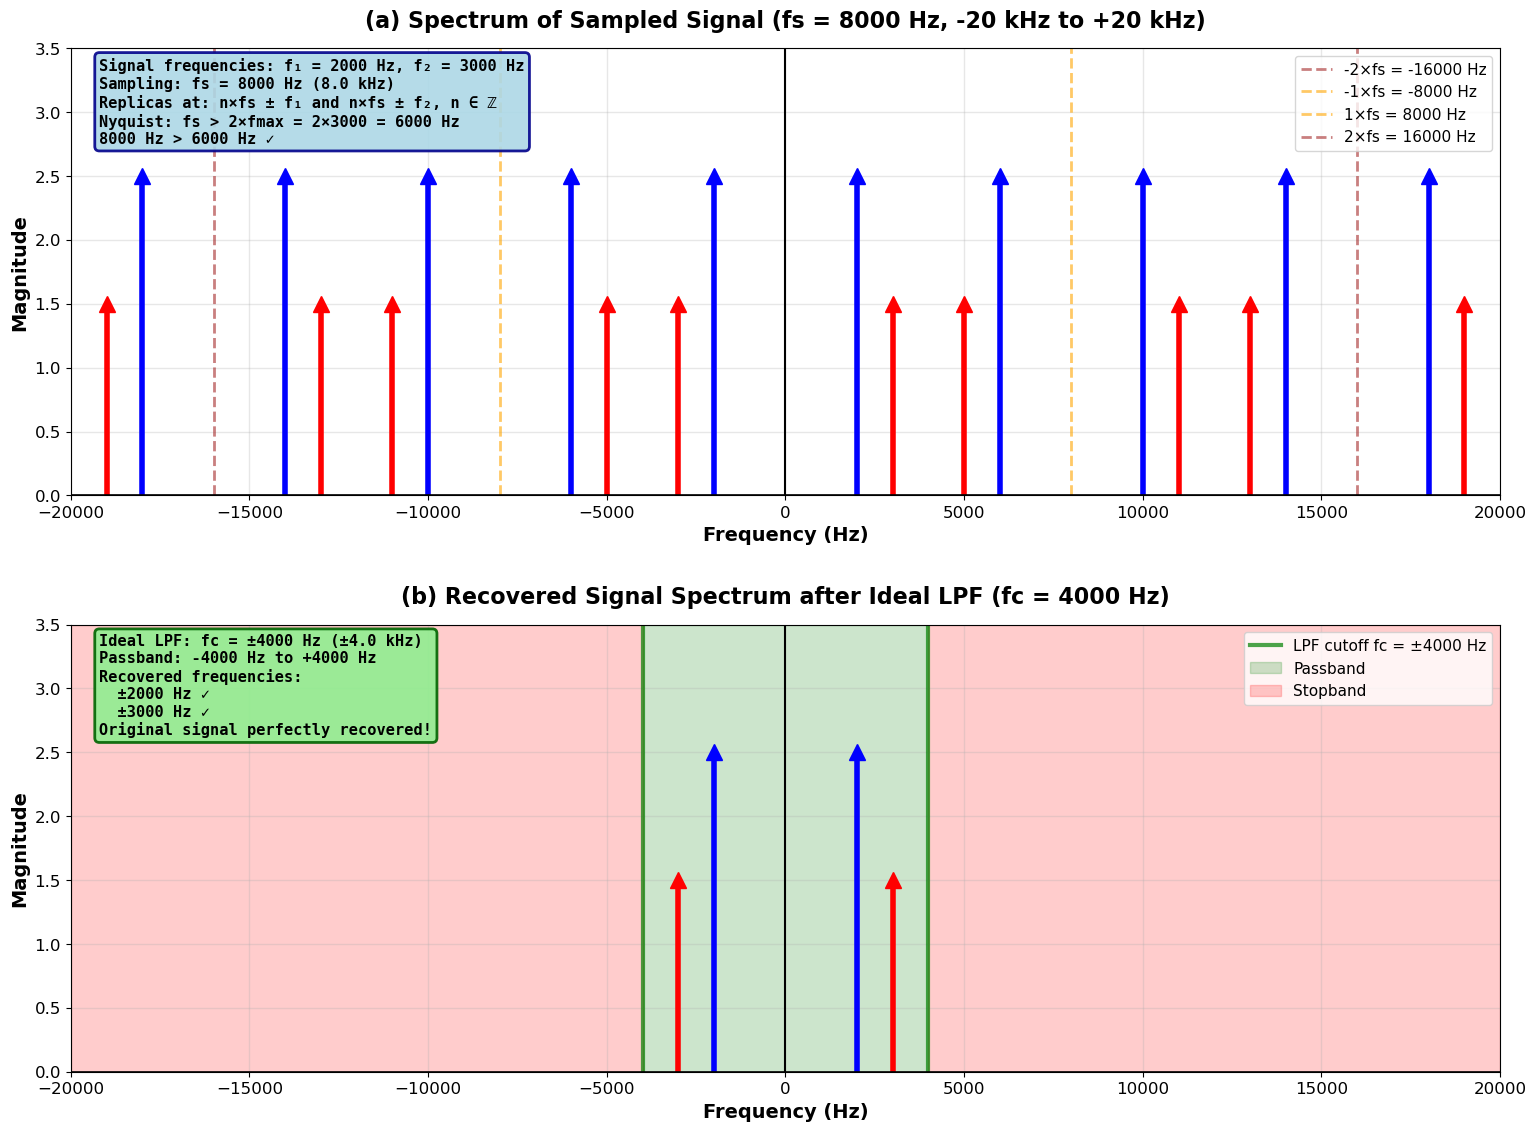


SUMMARY
Original signal has two frequency components: 2000 Hz and 3000 Hz

Sampling at fs = 8000 Hz is adequate:
  Shannon sampling theorem: fs > 2×fmax = 2×3000 = 6000 Hz
  8000 Hz > 6000 Hz ✓

Ideal LPF with fc = ±4000 Hz passes:
  ✓ Components at ±2000 Hz
  ✓ Components at ±3000 Hz

Conclusion: Original signal is perfectly recovered!


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f1 = 2000  # First signal frequency in Hz (2 kHz)
f2 = 3000  # Second signal frequency in Hz (3 kHz)
A1 = 5     # Amplitude of first component
A2 = 3     # Amplitude of second component
fs = 8000  # Sampling frequency in Hz (8 kHz)
fc = 4000  # Cutoff frequency of LPF in Hz (4 kHz)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

print("Exercise 2: Two-Component Signal")
print(f"Signal: x(t) = {A1} cos(2π × {f1} × t) + {A2} cos(2π × {f2} × t)")
print(f"Sampling frequency: {fs} Hz")
print(f"Filter cutoff frequency: {fc} Hz\n")

# ========== Part (a): Spectrum of Sampled Signal ==========
print("Part (a): Sampled Signal Spectrum (-20 kHz to +20 kHz)")

# Calculate all replicas from -20 to +20 kHz
# Replicas occur at: n*fs ± f1 and n*fs ± f2 for all integer n
replicas_f1 = []
replicas_f2 = []

# For each multiple of fs (both positive and negative)
for n in range(-2, 3):  # n = -2, -1, 0, 1, 2 to cover -20 to +20 kHz range
    # Replicas of f1
    freq_pos = n * fs + f1
    if -20000 <= freq_pos <= 20000:
        replicas_f1.append(freq_pos)
    
    freq_neg = n * fs - f1
    if -20000 <= freq_neg <= 20000:
        replicas_f1.append(freq_neg)
    
    # Replicas of f2
    freq_pos = n * fs + f2
    if -20000 <= freq_pos <= 20000:
        replicas_f2.append(freq_pos)
    
    freq_neg = n * fs - f2
    if -20000 <= freq_neg <= 20000:
        replicas_f2.append(freq_neg)

# Remove duplicates and sort
replicas_f1 = sorted(list(set(replicas_f1)))
replicas_f2 = sorted(list(set(replicas_f2)))

print(f"\nReplicas of f₁ = {f1} Hz:")
for freq in replicas_f1:
    print(f"  {freq} Hz ({freq/1000} kHz)")

print(f"\nReplicas of f₂ = {f2} Hz:")
for freq in replicas_f2:
    print(f"  {freq} Hz ({freq/1000} kHz)")

# Plot sampled signal spectrum
magnitudes_f1 = [A1/2] * len(replicas_f1)
magnitudes_f2 = [A2/2] * len(replicas_f2)

for f in replicas_f1:
    ax1.vlines(f, 0, A1/2, colors='blue', linewidth=4)
    ax1.plot(f, A1/2, marker='^', markersize=12, color='blue')


for f in replicas_f2:
    ax1.vlines(f, 0, A2/2, colors='red', linewidth=4)
    ax1.plot(f, A2/2, marker='^', markersize=12, color='red')


# Add vertical reference lines at multiples of fs (both positive and negative)
colors = ['purple', 'orange', 'brown', 'cyan']
for n in [-2, -1, 1, 2]:
    if -20000 <= n * fs <= 20000:
        color = colors[abs(n) % len(colors)]
        ax1.axvline(n * fs, color=color, linestyle='--', 
                   linewidth=2, alpha=0.6, label=f'{n}×fs = {n * fs} Hz')

ax1.axvline(0, color='k', linestyle='-', linewidth=1.5)
ax1.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax1.set_xlim(-20000, 20000)
ax1.set_ylim(0, 3.5)
ax1.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax1.set_title(f'(a) Spectrum of Sampled Signal (fs = {fs} Hz, -20 kHz to +20 kHz)', 
              fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linewidth=1)
ax1.legend(fontsize=11, loc='upper right')
ax1.tick_params(axis='both', which='major', labelsize=12)

# Add text box with key information
textstr = f'Signal frequencies: f₁ = {f1} Hz, f₂ = {f2} Hz\n'
textstr += f'Sampling: fs = {fs} Hz ({fs/1000} kHz)\n'
textstr += f'Replicas at: n×fs ± f₁ and n×fs ± f₂, n ∈ ℤ\n'
textstr += f'Nyquist: fs > 2×fmax = 2×{f2} = {2*f2} Hz\n'
textstr += f'{fs} Hz > {2*f2} Hz ✓'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9, 
             edgecolor='darkblue', linewidth=2)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=props, family='monospace', fontweight='bold')

# ========== Part (b): Recovered Signal Spectrum with LPF ==========

# For ideal LPF, only plot frequencies within the passband: -fc < f < fc
recovered_f1_all = [freq for freq in replicas_f1 if -fc < freq < fc]
recovered_f2_all = [freq for freq in replicas_f2 if -fc < freq < fc]

# Plot recovered signal spectrum (only in passband)
if recovered_f1_all:
    magnitudes_rec_f1 = [A1/2] * len(recovered_f1_all)
    for f in recovered_f1_all:
      ax2.vlines(f, 0, A1/2, colors='blue', linewidth=4)
      ax2.plot(f, A1/2, marker='^', markersize=12, color='blue')


if recovered_f2_all:
    magnitudes_rec_f2 = [A2/2] * len(recovered_f2_all)
    for f in recovered_f2_all:
      ax2.vlines(f, 0, A2/2, colors='red', linewidth=4)
      ax2.plot(f, A2/2, marker='^', markersize=12, color='red')

# Add cutoff frequency lines (both positive and negative)
ax2.axvline(fc, color='green', linestyle='-', linewidth=3, alpha=0.7, 
           label=f'LPF cutoff fc = ±{fc} Hz')
ax2.axvline(-fc, color='green', linestyle='-', linewidth=3, alpha=0.7)

# Shade only the passband region (no stopband shading)
ax2.axvspan(-fc, fc, alpha=0.2, color='green', label='Passband')
ax2.axvspan(-20000, -fc, alpha=0.2, color='red')
ax2.axvspan(fc, 20000, alpha=0.2, color='red', label='Stopband')

ax2.axvline(0, color='k', linestyle='-', linewidth=1.5)
ax2.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax2.set_xlim(-20000, 20000)
ax2.set_ylim(0, 3.5)
ax2.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax2.set_title(f'(b) Recovered Signal Spectrum after Ideal LPF (fc = {fc} Hz)', 
              fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linewidth=1)
ax2.legend(fontsize=11, loc='upper right')
ax2.tick_params(axis='both', which='major', labelsize=12)

# Add text box with recovery information
textstr2 = f'Ideal LPF: fc = ±{fc} Hz (±{fc/1000} kHz)\n'
textstr2 += f'Passband: -{fc} Hz to +{fc} Hz\n'
textstr2 += f'Recovered frequencies:\n'
textstr2 += f'  ±{f1} Hz ✓\n'
textstr2 += f'  ±{f2} Hz ✓\n'
textstr2 += f'Original signal perfectly recovered!'
props2 = dict(boxstyle='round', facecolor='lightgreen', alpha=0.9, 
             edgecolor='darkgreen', linewidth=2)
ax2.text(0.02, 0.98, textstr2, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=props2, family='monospace', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.08)
plt.savefig('signal_spectrum_ex2.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== Summary ==========
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Original signal has two frequency components: {f1} Hz and {f2} Hz")
print(f"\nSampling at fs = {fs} Hz is adequate:")
print(f"  Shannon sampling theorem: fs > 2×fmax = 2×{f2} = {2*f2} Hz")
print(f"  {fs} Hz > {2*f2} Hz ✓")
print(f"\nIdeal LPF with fc = ±{fc} Hz passes:")
print(f"  ✓ Components at ±{f1} Hz")
print(f"  ✓ Components at ±{f2} Hz")
print(f"\nConclusion: Original signal is perfectly recovered!")

## Exercise 3 — Two-Component Signal with Aliasing

### Original Signal

The continuous-time signal is:

x(t) = 5 cos(2π · 2000 · t) + 1 cos(2π · 5000 · t)

The signal contains two frequency components:

- f1 = ±2000 Hz  
- f2 = ±5000 Hz  

Each spectral line has the following magnitude:

- For f1: A1 / 2 = 2.5  
- For f2: A2 / 2 = 0.5  

---

### Sampling

The sampling frequency is:

fs = 8000 Hz

Sampling creates spectral replicas at:

n · fs ± f1  
n · fs ± f2  

where n is an integer.

The spectrum is observed between:

−20 kHz and +20 kHz

---

### Shannon sampling theorem

The maximum frequency of the signal is:

fmax = 5000 Hz

The Shannon sampling theorem is:

fs > 2 · fmax = 10000 Hz

Since:

fs = 8000 Hz < 10000 Hz

The Shannon sampling theorem condition is NOT satisfied  
--> Aliasing occurs for the component f2 = 5000 Hz

---

### Aliasing Effect

The frequency f2 = 5000 Hz folds back into the baseband:

Alias frequency = fs − f2 = 8000 − 5000 = 3000 Hz

So, after sampling:

- The component at ±2000 Hz remains correct  
- The component at ±5000 Hz appears at ±3000 Hz  

---

### Ideal Low-Pass Filtering

An ideal low-pass filter is applied with cutoff frequency:

fc = 4000 Hz

The passband is:

−4000 Hz to +4000 Hz

---

### Recovered Signal Spectrum

After filtering, the remaining components are:

- ±2000 Hz (correct)
- ±3000 Hz (aliased from ±5000 Hz)

--> The recovered signal is NOT identical to the original one.

Original signal:

x(t) = 5 cos(2π · 2000 · t) + 1 cos(2π · 5000 · t)

Recovered signal:

x(t) = 5 cos(2π · 2000 · t) + 1 cos(2π · 3000 · t)

---

### Conclusion

- Sampling frequency is insufficient
- Aliasing distorts the signal
- Even with an ideal low-pass filter, the original signal cannot be recovered

Exercise 3: Two-Component Signal with Aliasing
Signal: x(t) = 5 cos(2π × 2000 × t) + 1 cos(2π × 5000 × t)
Sampling frequency: 8000 Hz
Filter cutoff frequency: 4000 Hz

 Shannon sampling theorem check:
   fmax = 5000 Hz
   fs = 8000 Hz < 10000 Hz ✖
   ALIASING WILL OCCUR for f₂ = 5000 Hz!

Part (a): Sampled Signal Spectrum (-20 kHz to +20 kHz)

Replicas of f₁ = 2000 Hz:
  -18000 Hz (-18.0 kHz)
  -14000 Hz (-14.0 kHz)
  -10000 Hz (-10.0 kHz)
  -6000 Hz (-6.0 kHz)
  -2000 Hz (-2.0 kHz)
  2000 Hz (2.0 kHz)
  6000 Hz (6.0 kHz)
  10000 Hz (10.0 kHz)
  14000 Hz (14.0 kHz)
  18000 Hz (18.0 kHz)

Replicas of f₂ = 5000 Hz (ALIASED):
  -13000 Hz (-13.0 kHz)
  -11000 Hz (-11.0 kHz)
  -5000 Hz (-5.0 kHz)
  -3000 Hz (-3.0 kHz)
  3000 Hz (3.0 kHz) ← ALIAS of 5000 Hz! (fs - f₂ = 8000 - 5000 = 3000)
  5000 Hz (5.0 kHz)
  11000 Hz (11.0 kHz)
  13000 Hz (13.0 kHz)


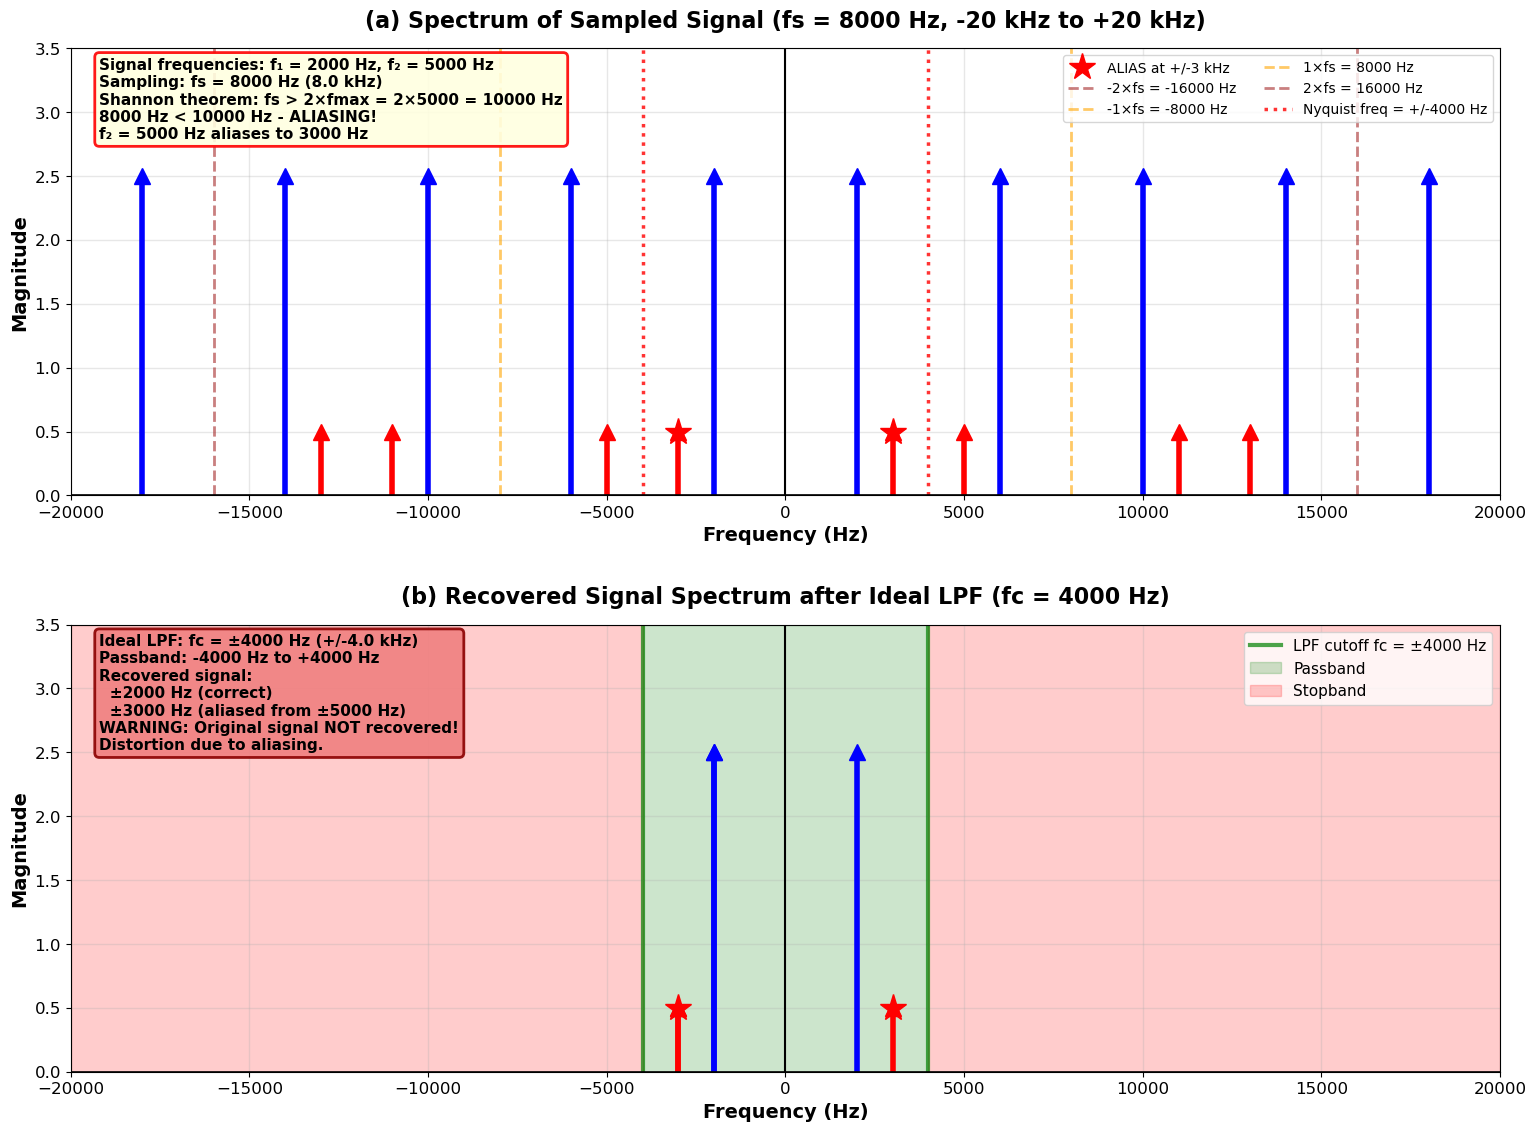


SUMMARY
Original signal has two frequency components: 2000 Hz and 5000 Hz

 Sampling at fs = 8000 Hz is INADEQUATE:
   Shannon sampling theorem: fs < 2×fmax
   8000 Hz < 2×5000 = 10000 Hz X

 >ALIASING OCCURS:
   f₂ = 5000 Hz appears as 3000 = 3000 Hz (alias)

Ideal LPF with fc = ±4000 Hz recovers:
   ✓ Component at ±2000 Hz (correct)
   X Component at ±3000 Hz (aliased, should be ±5000 Hz)

 CONCLUSION: Original signal CANNOT be recovered!
   Recovered signal: 5 cos(2π × 2000 × t) + 1 cos(2π × 3000 × t)
   This is different from the original signal due to aliasing.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
f1 = 2000  # First signal frequency in Hz (2 kHz)
f2 = 5000  # Second signal frequency in Hz (5 kHz)
A1 = 5     # Amplitude of first component
A2 = 1     # Amplitude of second component
fs = 8000  # Sampling frequency in Hz (8 kHz)
fc = 4000  # Cutoff frequency of LPF in Hz (4 kHz)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

print("Exercise 3: Two-Component Signal with Aliasing")
print(f"Signal: x(t) = {A1} cos(2π × {f1} × t) + {A2} cos(2π × {f2} × t)")
print(f"Sampling frequency: {fs} Hz")
print(f"Filter cutoff frequency: {fc} Hz")
print(f"\n Shannon sampling theorem check:")
print(f"   fmax = {f2} Hz")
print(f"   fs = {fs} Hz < {2*f2} Hz ✖")
print(f"   ALIASING WILL OCCUR for f₂ = {f2} Hz!\n")

# ========== Part (a): Spectrum of Sampled Signal ==========
print("Part (a): Sampled Signal Spectrum (-20 kHz to +20 kHz)")

# Calculate all replicas from -20 to +20 kHz
replicas_f1 = []
replicas_f2 = []

for n in range(-2, 3):  # n = -2, -1, 0, 1, 2
    # Replicas of f1
    freq_pos = n * fs + f1
    if -20000 <= freq_pos <= 20000:
        replicas_f1.append(freq_pos)
    freq_neg = n * fs - f1
    if -20000 <= freq_neg <= 20000:
        replicas_f1.append(freq_neg)
    # Replicas of f2
    freq_pos = n * fs + f2
    if -20000 <= freq_pos <= 20000:
        replicas_f2.append(freq_pos)
    freq_neg = n * fs - f2
    if -20000 <= freq_neg <= 20000:
        replicas_f2.append(freq_neg)

replicas_f1 = sorted(list(set(replicas_f1)))
replicas_f2 = sorted(list(set(replicas_f2)))

# Print replicas
print(f"\nReplicas of f₁ = {f1} Hz:")
for freq in replicas_f1:
    print(f"  {freq} Hz ({freq/1000} kHz)")

print(f"\nReplicas of f₂ = {f2} Hz (ALIASED):")
for freq in replicas_f2:
    alias_freq = freq if freq <= fs/2 else fs - freq
    if freq == 3000:
        print(f"  {freq} Hz ({freq/1000} kHz) ← ALIAS of {f2} Hz! (fs - f₂ = {fs} - {f2} = {freq})")
    else:
        print(f"  {freq} Hz ({freq/1000} kHz)")

# Plot sampled signal spectrum
magnitudes_f1 = [A1/2] * len(replicas_f1)
magnitudes_f2 = [A2/2] * len(replicas_f2)

# F₁
for f in replicas_f1:
    ax1.vlines(f, 0, A1/2, colors='blue', linewidth=4)
    ax1.plot(f, A1/2, marker='^', markersize=12, color='blue')


# F₂
for f in replicas_f2:
    ax1.vlines(f, 0, A2/2, colors='red', linewidth=4)
    ax1.plot(f, A2/2, marker='^', markersize=12, color='red')

# Highlight only the 3 kHz replicas (fs - f2) with stars
aliased_freqs = [freq for freq in replicas_f2 if abs(freq) == 3000]
for freq in aliased_freqs:
    ax1.plot(freq, A2/2, 'r*', markersize=20, zorder=5, 
             label='ALIAS at +/-3 kHz' if freq == 3000 else '')

# Vertical lines for multiples of fs
colors = ['purple', 'orange', 'brown', 'cyan']
for n in [-2, -1, 1, 2]:
    if -20000 <= n * fs <= 20000:
        color = colors[abs(n) % len(colors)]
        ax1.axvline(n * fs, color=color, linestyle='--', 
                   linewidth=2, alpha=0.6, label=f'{n}×fs = {n * fs} Hz')

# Nyquist frequency lines
ax1.axvline(fs/2, color='red', linestyle=':', linewidth=2.5, alpha=0.8, 
           label=f'Nyquist freq = +/-{int(fs/2)} Hz')
ax1.axvline(-fs/2, color='red', linestyle=':', linewidth=2.5, alpha=0.8)

ax1.axvline(0, color='k', linestyle='-', linewidth=1.5)
ax1.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax1.set_xlim(-20000, 20000)
ax1.set_ylim(0, 3.5)
ax1.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax1.set_title(f'(a) Spectrum of Sampled Signal (fs = {fs} Hz, -20 kHz to +20 kHz)', 
              fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linewidth=1)
ax1.legend(fontsize=10, loc='upper right', ncol=2)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Text box
textstr = f'Signal frequencies: f₁ = {f1} Hz, f₂ = {f2} Hz\n'
textstr += f'Sampling: fs = {fs} Hz ({fs/1000} kHz)\n'
textstr += f'Shannon theorem: fs > 2×fmax = 2×{f2} = {2*f2} Hz\n'
textstr += f'{fs} Hz < {2*f2} Hz - ALIASING!\n'
textstr += f'f₂ = {f2} Hz aliases to {fs - f2} Hz'
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, 
             edgecolor='red', linewidth=2)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=props, fontweight='bold')

# ========== Part (b): Recovered Signal Spectrum with LPF ==========

# LPF: keep only frequencies |f| <= fc
recovered_f1_all = [f for f in ([-f1] + [freq for freq in replicas_f1 if freq <= fc]) if abs(f) <= fc]
recovered_f2_all = [f for f in ([-3000] + [freq for freq in replicas_f2 if freq <= fc]) if abs(f) <= fc]

# Plot recovered spectrum
if recovered_f1_all:
    for f in recovered_f1_all:
     ax2.vlines(f, 0, A1/2, colors='blue', linewidth=4)
     ax2.plot(f, A1/2, marker='^', markersize=12, color='blue')


if recovered_f2_all:
    for f in recovered_f2_all:
     ax2.vlines(f, 0, A2/2, colors='red', linewidth=4)
     ax2.plot(f, A2/2, marker='^', markersize=12, color='red')

# Highlight aliased frequencies
ax2.plot(3000, A2/2, 'r*', markersize=20, zorder=5)
ax2.plot(-3000, A2/2, 'r*', markersize=20, zorder=5)

# LPF cutoff lines
ax2.axvline(fc, color='green', linestyle='-', linewidth=3, alpha=0.7, label=f'LPF cutoff fc = ±{fc} Hz')
ax2.axvline(-fc, color='green', linestyle='-', linewidth=3, alpha=0.7)

# Shade passband and stopband
ax2.axvspan(-fc, fc, alpha=0.2, color='green', label='Passband')
ax2.axvspan(-20000, -fc, alpha=0.2, color='red')
ax2.axvspan(fc, 20000, alpha=0.2, color='red', label='Stopband')

ax2.axvline(0, color='k', linestyle='-', linewidth=1.5)
ax2.axhline(0, color='k', linestyle='-', linewidth=1.2)
ax2.set_xlim(-20000, 20000)
ax2.set_ylim(0, 3.5)
ax2.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Magnitude', fontsize=14, fontweight='bold')
ax2.set_title(f'(b) Recovered Signal Spectrum after Ideal LPF (fc = {fc} Hz)', 
              fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linewidth=1)
ax2.legend(fontsize=11, loc='upper right')
ax2.tick_params(axis='both', which='major', labelsize=12)

# Text box for LPF info
textstr2 = f'Ideal LPF: fc = ±{fc} Hz (+/-{fc/1000} kHz)\n'
textstr2 += f'Passband: -{fc} Hz to +{fc} Hz\n'
textstr2 += f'Recovered signal:\n'
textstr2 += f'  ±{f1} Hz (correct)\n'
textstr2 += f'  ±3000 Hz (aliased from ±{f2} Hz)\n'
textstr2 += f'WARNING: Original signal NOT recovered!\n'
textstr2 += f'Distortion due to aliasing.'
props2 = dict(boxstyle='round', facecolor='lightcoral', alpha=0.9, 
             edgecolor='darkred', linewidth=2)
ax2.text(0.02, 0.98, textstr2, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=props2, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.08)
plt.savefig('signal_spectrum_ex3.png', dpi=300, bbox_inches='tight')
plt.show()
# ========== Summary ==========
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Original signal has two frequency components: {f1} Hz and {f2} Hz")
print(f"\n Sampling at fs = {fs} Hz is INADEQUATE:")
print(f"   Shannon sampling theorem: fs < 2×fmax")
print(f"   {fs} Hz < 2×{f2} = {2*f2} Hz X")
print(f"\n >ALIASING OCCURS:")
print(f"   f₂ = {f2} Hz appears as {fs - f2} = 3000 Hz (alias)")
print(f"\nIdeal LPF with fc = ±{fc} Hz recovers:")
print(f"   ✓ Component at ±{f1} Hz (correct)")
print(f"   X Component at ±3000 Hz (aliased, should be ±{f2} Hz)")
print(f"\n CONCLUSION: Original signal CANNOT be recovered!")
print(f"   Recovered signal: {A1} cos(2π × {f1} × t) + {A2} cos(2π × 3000 × t)")
print(f"   This is different from the original signal due to aliasing.")

# Exercise 4 – Signal Spectrum Analysis and Aliasing Problem

---

## Signal Parameters

x(t) = 1 + 1 × cos(2π × 2000 t) + 2 × cos(2π × 4000 t) + 3 × cos(2π × 6000 t)

- DC = 1  
- f1 = 2000 Hz, A1 = 1  
- f2 = 4000 Hz, A2 = 2  
- f3 = 6000 Hz, A3 = 3  
- Sampling frequency: fs = 8000 Hz  
- Lowpass filter cutoff (LPF): fc = 6000 Hz  

---

## Shannon Theorem Check

fmax = 6000 Hz ; fs > 2 × fmax = 12000 Hz

fs = 8000 Hz < 12000 Hz --> Aliasing will occur!

---

## (a) Original Signal Spectrum (Bilateral)

**Frequency components:**

| Frequency | Amplitude |
|-----------|-----------|
| DC = 0 Hz | 1         |
| ±2000 Hz | 0.5       |
| ±4000 Hz | 1         |
| ±6000 Hz | 1.5       |

> The bilateral spectrum shows all ±f components and the DC component.

---

## (b) Unilateral Spectrum of Sampled Signal (0 to 40 kHz)

- Shows only positive frequencies  
- All alias replicas appear in the positive spectrum  
- Vertical lines indicate multiples of fs

> Observed replicas:  

| Frequency (Hz) | Amplitude | Component |
|----------------|-----------|-----------|
| 0              | 1         | DC        |
| 2000           | 1       | f1        |
| 4000           | 2         | f2        |
| 6000           | 3       | f3        |

---

## (c) Bilateral Spectrum of Sampled Signal (-40 to +40 kHz)

- Shows both positive and negative frequencies  
- Symmetric around f = 0  
- Each component split into ±f  
- Magnitudes at ±f are half of unilateral spectrum

| Frequency (Hz) | Amplitude | Component |
|----------------|-----------|-----------|
|-6000           |1.5        |-f3        |
|-4000           | 1         |-f2        |
|-2000           | 0.5       |-f1        |
| 0              | 1         | DC        |
| 2000           | 0.5       | f1        |
| 4000           | 1        | f2        |
| 6000           | 1.5      | f3        |

---

## (d) Conclusion on Unilateral vs Bilateral Spectrum

**Comparison:**

1. **Unilateral:**  
   - Shows only positive frequencies  
   - Practical for real signals  
   - All energy on the positive axis  

2. **Bilateral:**  
   - Shows positive and negative frequencies  
   - Symmetric around 0  
   - Each frequency split into ±f  
   - Amplitude at ±f = half of unilateral  

**Key points:**  
- Both contain the same information for real signals  
- Bilateral better shows aliasing symmetry  

---

## (e) Aliasing Frequencies

- Multiples of fs create replicas of the original spectrum  
- Aliasing occurs because some frequencies exceed fs/2 and overlap  

**Aliasing frequencies:** ±2000 Hz, ±4000 Hz, ±6000 Hz

---

## (f) Recovered Spectrum with 6 kHz LPF (Bilateral)

- Only frequencies between -6 kHz and +6 kHz pass through the filter (bilateral spectrum)  
- Natural amplitudes are kept for DC and in-band components  

| Frequency (Hz) | Amplitude |
|----------------|-----------|
| 0              | 1         |
| ±2000          | 2         |
| ±4000          | 2         |
| ±6000          | 2         |

- Frequencies outside ±6 kHz are blocked (stopband)  

---

## (g) Proposed Filter to Recover Original Signal

**Problem:**  
fs = 8000 Hz < 2×fmax = 12000 Hz → aliasing occurs. To recover the original signal, we apply a specially designed **non-normalized lowpass filter**.

**Solution Implemented:**  
- Use a lowpass filter with cutoff frequency fc = 6000 Hz.  
- Filter is **non-normalized**, meaning each frequency component is multiplied by a specific gain to restore the original amplitudes.  
- Gains used for recovery:  
  - DC (0 Hz): gain = 1 → amplitude remains 1  
  - ±2000 Hz: gain = 0.25 → recovers amplitude = 0.5  
  - ±4000 Hz: gain = 0.5 → recovers amplitude = 1  
  - ±6000 Hz: gain = 0.75 → recovers amplitude = 1.5 

**Result:**  
- All in-band frequencies (between -6 kHz and +6 kHz, bilateral) are restored to match the original signal amplitudes.  
- Frequencies beyond ±6 kHz are blocked (stopband).  
- This approach allows the **original signal spectrum** to be effectively recovered despite initial aliasing.

---


Exercise 4: Four-Component Signal with Aliasing
Signal: x(t) = 1 + 1cos(2π×2000t) + 2cos(2π×4000t) + 3cos(2π×6000t)
Sampling frequency: fs = 8000 Hz

Shannon Sampling Theorem Check:
  fmax = 6000 Hz
  Required: fs > 2×fmax = 12000 Hz
  Actual: fs = 8000 Hz
  8000 Hz < 12000 Hz --> ALIASING WILL OCCUR!

(a) ORIGINAL SIGNAL SPECTRUM
--------------------------------------------------------------------------------
Frequency components:
  DC = 1
  ±2000 Hz (amplitude 0.5 each)
  ±4000 Hz (amplitude 1.0 each)
  ±6000 Hz (amplitude 1.5 each)

(b) UNILATERAL SPECTRUM OF SAMPLED SIGNAL (0 to 40 kHz)
--------------------------------------------------------------------------------
Replicas appear at (unilateral, 0 to 40000 Hz):
       0 Hz : amplitude = 1.00
    2000 Hz : amplitude = 4.00
    4000 Hz : amplitude = 4.00
    6000 Hz : amplitude = 4.00
   10000 Hz : amplitude = 4.00
   12000 Hz : amplitude = 4.00
   14000 Hz : amplitude = 4.00
   18000 Hz : amplitude = 4.00
   20000 Hz : amplitude =

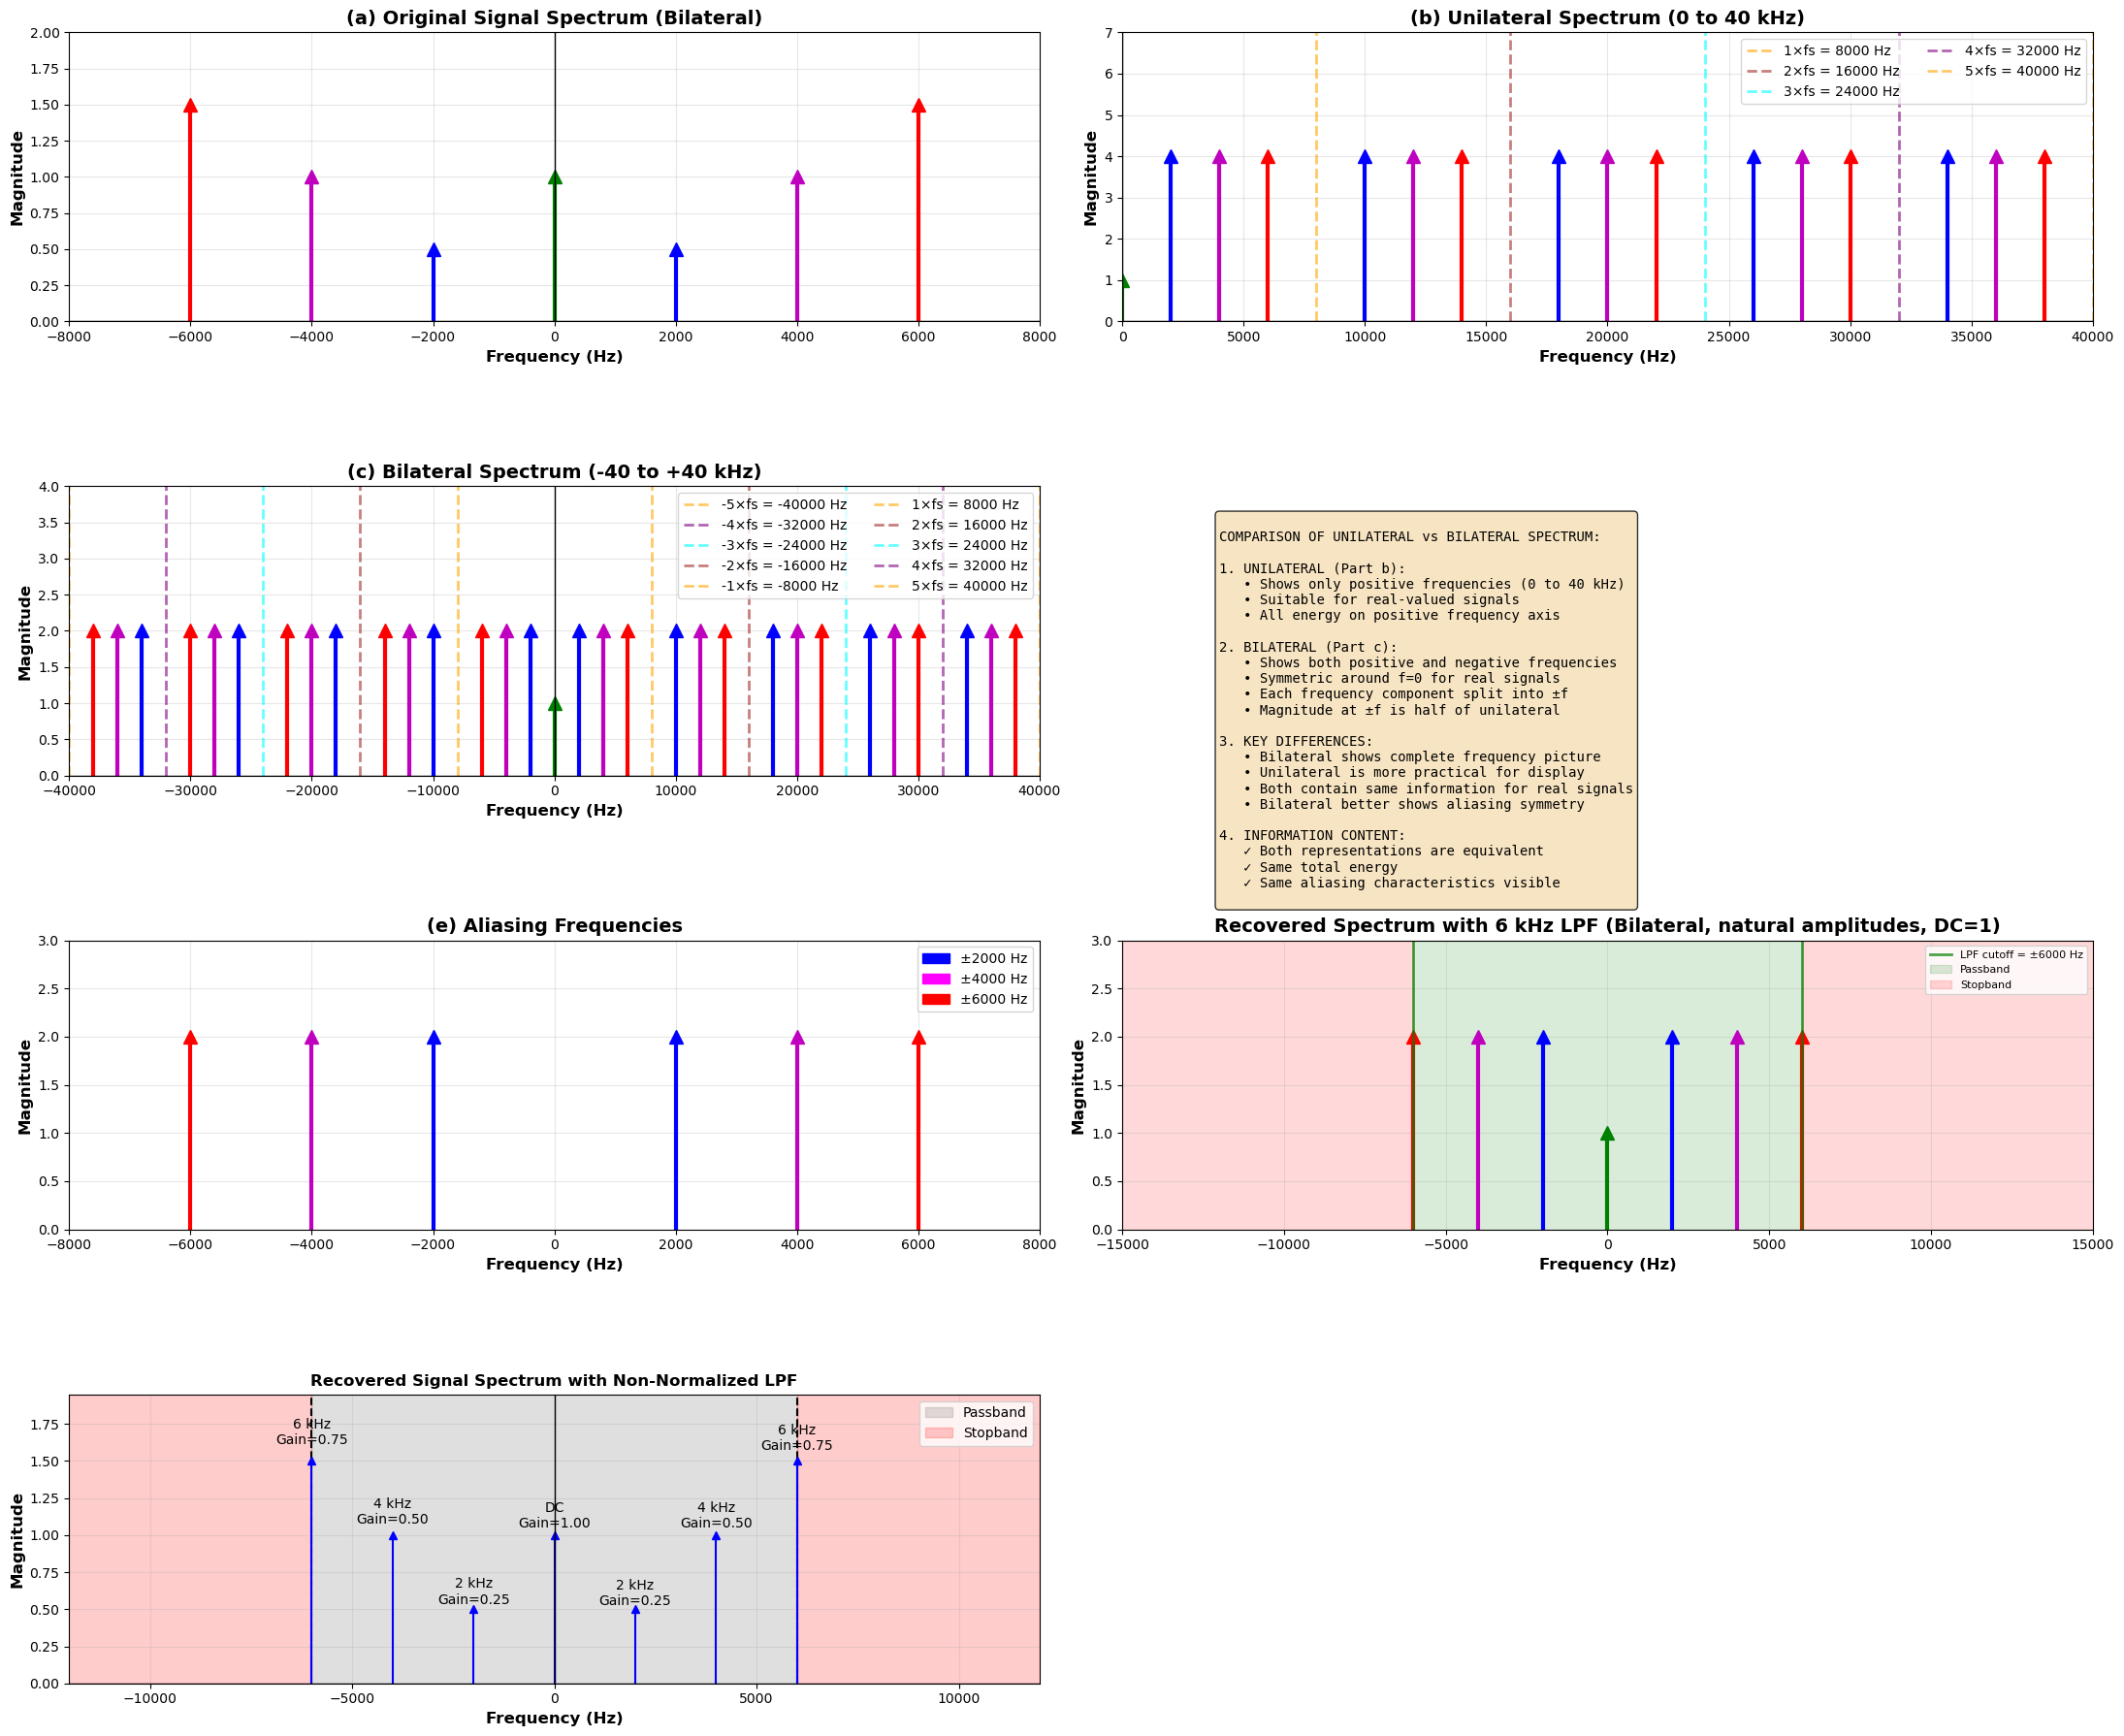


SUMMARY

Signal components:
  DC: 1 (0 Hz)
  f1: 2000 Hz, amplitude = 1
  f2: 4000 Hz, amplitude = 2
  f3: 6000 Hz, amplitude = 3

Sampling frequency check:
  fs = 8000 Hz < 2*fmax = 12000 Hz --> aliasing occurs

Key observations from spectra:
  1. Original spectrum (bilateral) shows ±f components for all 4 frequencies.
  2. Unilateral spectrum shows only positive frequencies, amplitudes summed for overlapping replicas.
  3. Bilateral spectrum shows both ±f frequencies, symmetric around 0 Hz.
  4. Aliasing occurs due to fs < 2*fmax.
  5. Recovered signal with 6 kHz LPF still shows aliasing effects; it does not match the original signal.
  6. Applying gains in the LPF restores the original signal amplitudes, correcting the aliasing effects.

Recovered frequencies and amplitudes with non-normalized LPF:
       0 Hz : amplitude = 1.00
    2000 Hz : amplitude = 0.50
    4000 Hz : amplitude = 1.00
    6000 Hz : amplitude = 1.50

Conclusion:
  - The exercise demonstrates how aliasing affect

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
# x(t) = 1 + 1*cos(2π*2000*t) + 2*cos(2π*4000*t) + 3*cos(2π*6000*t)
DC = 1
f1, A1 = 2000, 1
f2, A2 = 4000, 2
f3, A3 = 6000, 3
fs = 8000  # Sampling frequency
fc_lpf = 6000  # Lowpass filter cutoff

print("="*80)
print("Exercise 4: Four-Component Signal with Aliasing")
print("="*80)
print(f"Signal: x(t) = {DC} + {A1}cos(2π×{f1}t) + {A2}cos(2π×{f2}t) + {A3}cos(2π×{f3}t)")
print(f"Sampling frequency: fs = {fs} Hz")
print(f"\nShannon Sampling Theorem Check:")
print(f"  fmax = {f3} Hz")
print(f"  Required: fs > 2×fmax = {2*f3} Hz")
print(f"  Actual: fs = {fs} Hz")
print(f"  {fs} Hz < {2*f3} Hz --> ALIASING WILL OCCUR!")
print("="*80)

# Create figure with multiple subplots
fig = plt.figure(figsize=(22, 18))

# ========== Part (a): Original Signal Spectrum ==========
print("\n(a) ORIGINAL SIGNAL SPECTRUM")
print("-"*80)

ax1 = plt.subplot(4, 2, 1)
# Original spectrum (bilateral)
freqs_orig = [-f3, -f2, -f1, 0, f1, f2, f3]
mags_orig = [A3/2, A2/2, A1/2, DC, A1/2, A2/2, A3/2]
colors_orig = ['r','m','b','g','b','m','r']

for f, m, c in zip(freqs_orig, mags_orig, colors_orig):
    ax1.vlines(f, 0, m, colors=c, linewidth=3)
    ax1.plot(f, m, marker='^', color=c, markersize=10)


ax1.axvline(0, color='k', linestyle='-', linewidth=1)
ax1.axhline(0, color='k', linestyle='-', linewidth=1)
ax1.set_xlim(-8000, 8000)
ax1.set_ylim(0, 2)
ax1.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax1.set_title('(a) Original Signal Spectrum (Bilateral)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

print(f"Frequency components:")
print(f"  DC = {DC}")
print(f"  ±{f1} Hz (amplitude {A1/2} each)")
print(f"  ±{f2} Hz (amplitude {A2/2} each)")
print(f"  ±{f3} Hz (amplitude {A3/2} each)")

# ========== Part (b): Unilateral Spectrum (0 to 40 kHz) ==========
print("\n(b) UNILATERAL SPECTRUM OF SAMPLED SIGNAL (0 to 40 kHz)")
print("-"*80)

ax2 = plt.subplot(4, 2, 2)

freq_dict_uni = {}  # Key = frequence, value = total amplitude 
fs_max = 40000

for n in range(-5, 6):
    for f, A in [(0, DC), (f1, A1/2), (f2, A2/2), (f3, A3/2)]:
        if f == 0:
            # DC: add only once at 0 Hz
            if n == 0:
                freq = 0
                freq_dict_uni[freq] = A
        else:
            for freq in [abs(n*fs + f), abs(n*fs - f)]:  # Unilateral, take only positive values
                if 0 <= freq <= fs_max:
                    if freq in freq_dict_uni:
                        freq_dict_uni[freq] += A
                    else:
                        freq_dict_uni[freq] = A

# Sort for plotting
freqs_uni = sorted(freq_dict_uni.keys())
mags_uni = [freq_dict_uni[f] for f in freqs_uni]

# Colors according to original component
colors_uni = []
for f in freqs_uni:
    if abs(f) < 1e-6:
        colors_uni.append('g')       # DC
    elif abs(f % fs - f1) < 1e-6:
        colors_uni.append('b')       # f1
    elif abs(f % fs - f2) < 1e-6:
        colors_uni.append('m')       # f2
    else:
        colors_uni.append('r')       # f3 ou autres

# Plot
for f, m, c in zip(freqs_uni, mags_uni, colors_uni):
    ax2.vlines(f, 0, m, colors=c, linewidth=3)
    ax2.plot(f, m, marker='^', color=c, markersize=10)

# Vertical lines for multiples of fs
colors = ['purple', 'orange', 'brown', 'cyan']
for n in [1, 2, 3, 4, 5]:
    if -40000 <= n * fs <= 40000:
        color = colors[abs(n) % len(colors)]
        ax2.axvline(n * fs, color=color, linestyle='--', 
                   linewidth=2, alpha=0.6, label=f'{n}×fs = {n * fs} Hz')
        
ax2.axvline(0, color='k', linestyle='-', linewidth=1)
ax2.axhline(0, color='k', linestyle='-', linewidth=1)
ax2.set_xlim(0, 40000)
ax2.set_ylim(0, 7)
ax2.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax2.set_title('(b) Unilateral Spectrum (0 to 40 kHz)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='upper right', ncol=2)

print(f"Replicas appear at (unilateral, 0 to {fs_max} Hz):")
for f, m in zip(freqs_uni, mags_uni):
    print(f"  {f:6.0f} Hz : amplitude = {m:.2f}")

# ========== Part (c): Bilateral Spectrum (-40 to +40 kHz) ==========
print("\n(c) BILATERAL SPECTRUM OF SAMPLED SIGNAL (-40 to +40 kHz)")
print("-"*80)

ax3 = plt.subplot(4, 2, 3)

# Calculate replicas for bilateral spectrum
replicas_bi = []
max_freq_bi = 40000

for n in range(-5, 6):
    
# Use a dictionary to sum the amplitudes
 freq_dict = {} # key = frequency, value = total amplitude
for n in range(-5, 6):  # replications
    # Signal components
    for f, A in [(0, DC), (f1, A1/2), (f2, A2/2), (f3, A3/2)]:
        if f == 0:
            # DC: add only once at 0 Hz
            if n == 0:
                freq_dict[0] = A
        else:
            # Positive and negative replicas
            for freq in [n*fs + f, n*fs - f]:
                if -40000 <= freq <= 40000:
                    if freq in freq_dict:
                        freq_dict[freq] += A
                    else:
                        freq_dict[freq] = A
 
replicas_bi = sorted(set(replicas_bi), key=lambda x: x[0])
# Sort frequencies for display
freqs_bi = sorted(freq_dict.keys())
mags_bi = [freq_dict[f] for f in freqs_bi]
colors_bi = []
for f in freqs_bi:
    if abs(f) < 1e-6:   # DC
        colors_bi.append('g')
    elif abs(abs(f) % fs - f1) < 1e-6:
        colors_bi.append('b')
    elif abs(abs(f) % fs - f2) < 1e-6:
        colors_bi.append('m')
    else:
        colors_bi.append('r')

for f, m, c in zip(freqs_bi, mags_bi, colors_bi):
    ax3.vlines(f, 0, m, colors=c, linewidth=3)
    ax3.plot(f, m, marker='^', color=c, markersize=10)

# Vertical lines for multiples of fs
colors = ['purple', 'orange', 'brown', 'cyan']
for n in [-5,-4,-3,-2, -1, 1, 2, 3, 4, 5]:
    if -40000 <= n * fs <= 40000:
        color = colors[abs(n) % len(colors)]
        ax3.axvline(n * fs, color=color, linestyle='--', 
                   linewidth=2, alpha=0.6, label=f'{n}×fs = {n * fs} Hz')

ax3.axvline(0, color='k', linestyle='-', linewidth=1)
ax3.axhline(0, color='k', linestyle='-', linewidth=1)
ax3.set_xlim(-max_freq_bi, max_freq_bi)
ax3.set_ylim(0, 4)
ax3.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax3.set_title('(c) Bilateral Spectrum (-40 to +40 kHz)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=10, loc='upper right', ncol=2)

print(f"\nFrequencies and amplitudes in the bilateral spectrum (-40 to +40 kHz):")
for f, m in zip(freqs_bi, mags_bi):
    print(f"  {f:7.0f} Hz : amplitude = {m:.2f}")

# ========== Part (d): Conclusion about b and c ==========
ax4 = plt.subplot(4, 2, 4)
ax4.axis('off')

conclusion_text = """
COMPARISON OF UNILATERAL vs BILATERAL SPECTRUM:

1. UNILATERAL (Part b):
   • Shows only positive frequencies (0 to 40 kHz)
   • Suitable for real-valued signals
   • All energy on positive frequency axis
   
2. BILATERAL (Part c):
   • Shows both positive and negative frequencies
   • Symmetric around f=0 for real signals
   • Each frequency component split into ±f
   • Magnitude at ±f is half of unilateral
   
3. KEY DIFFERENCES:
   • Bilateral shows complete frequency picture
   • Unilateral is more practical for display
   • Both contain same information for real signals
   • Bilateral better shows aliasing symmetry
   
4. INFORMATION CONTENT:
   ✓ Both representations are equivalent
   ✓ Same total energy
   ✓ Same aliasing characteristics visible
"""

ax4.text(0.1, 0.9, conclusion_text, fontsize=10, verticalalignment='top', 
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ========== Part (e): Aliasing Frequencies =========

ax5 = plt.subplot(4, 2, 5)

# Frequencies and amplitudes (bilateral: amplitudes halved)
components = [(f1, A1/2, 'f1'), (f2, A2/2, 'f2'), (f3, A3/2, 'f3')]
freq_alias_dict = {}

# Consider n multiples of fs for aliasing (positive and negative)
n_range = range(-2, 3)  # enough to cover main aliases

for f_orig, amp, name in components:
    for n in n_range:
        for sign in [+1, -1]:
            f_alias = n*fs + sign*f_orig
            if f_alias in freq_alias_dict:
                freq_alias_dict[f_alias] += amp
            else:
                freq_alias_dict[f_alias] = amp

from matplotlib.patches import Patch

# Créer des patchs pour la légende
legend_patches = [
    Patch(color='blue', label='±2000 Hz'),
    Patch(color='magenta', label='±4000 Hz'),
    Patch(color='red', label='±6000 Hz')
]
# Prepare lists for plotting
freqs_plot = sorted(freq_alias_dict.keys())
amps_plot = [freq_alias_dict[f] for f in freqs_plot]

# Colors
colors_plot = []
for f in freqs_plot:
    if f == 0:
        colors_plot.append('g')
    elif abs(f) == f1:
        colors_plot.append('b')
    elif abs(f) == f2:
        colors_plot.append('m')
    elif abs(f) == f3 or abs(f) == abs(fs-f3):
        colors_plot.append('r')
    else:
        colors_plot.append('k')

# Stem plot
for f, a, c in zip(freqs_plot, amps_plot, colors_plot):
    ax5.vlines(f, 0, a, colors=c, linewidth=3)
    ax5.plot(f, a, marker='^', color=c, markersize=10)

ax5.set_xlim(-8000, 8000)
ax5.set_ylim(0, 3)
ax5.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax5.set_title('(e) Aliasing Frequencies', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend(handles=legend_patches, fontsize=10, loc='upper right')

# ========== Part (f): Recovered Signal with 6 kHz LPF (bilateral, natural amplitudes, DC=1) ==========
print("\n(f) RECOVERED SIGNAL SPECTRUM (6 kHz Ideal LPF, bilateral)")
print("-"*80)

ax6 = plt.subplot(4, 2, 6)  # 6th subplot

# --- Parameters ---
fc_lpf = 6000  # LPF cutoff
components = [(0, DC, 'DC'), (f1, A1/2, 'f1'), (f2, A2/2, 'f2'), (f3, A3/2, 'f3')]
n_range = range(-2, 3)  # multiples of fs for aliasing

from collections import defaultdict
freq_dict = defaultdict(float)

# --- Compute aliased contributions (both positive and negative) ---
for f_orig, amp, name in components:
    for n in n_range:
        for sign in [+1, -1]:
            f_alias = n*fs + sign*f_orig
            if f_orig == 0:  # keep DC amplitude natural
                freq_dict[f_alias] = amp
            else:
                freq_dict[f_alias] += amp  # sum contributions

# --- Keep only frequencies inside LPF ---
recovered_freqs = [(f, a) for f, a in freq_dict.items() if abs(f) <= fc_lpf]

# --- Prepare lists for plotting ---
freqs_plot = sorted([f for f, a in recovered_freqs])
amps_plot = [freq_dict[f] for f in freqs_plot]

# --- Colors ---
colors_plot = []
for f in freqs_plot:
    abs_f = abs(f)
    if abs_f == 0:
        colors_plot.append('g')
    elif abs_f == f1:
        colors_plot.append('b')
    elif abs_f == f2:
        colors_plot.append('m')
    elif abs_f == f3:
        colors_plot.append('r')
    else:
        colors_plot.append('k')

# --- Stem plot (bilateral) ---
for f, a, c in zip(freqs_plot, amps_plot, colors_plot):
    ax6.vlines(f, 0, a, colors=c, linewidth=3)
    ax6.plot(f, a, marker='^', color=c, markersize=10)
    
# --- LPF indication ---
ax6.axvline(fc_lpf, color='green', linestyle='-', linewidth=2, alpha=0.7, label=f'LPF cutoff = ±{fc_lpf} Hz')
ax6.axvline(-fc_lpf, color='green', linestyle='-', linewidth=2, alpha=0.7)
ax6.axvspan(-fc_lpf, fc_lpf, alpha=0.15, color='green', label='Passband')
ax6.axvspan(-15000, -fc_lpf, alpha=0.15, color='red')
ax6.axvspan(fc_lpf, 15000, alpha=0.15, color='red', label='Stopband')

# --- Plot settings ---
ax6.set_xlim(-15000, 15000)
ax6.set_ylim(0, 3)
ax6.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax6.set_title('Recovered Spectrum with 6 kHz LPF (Bilateral, natural amplitudes, DC=1)', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend(fontsize=8)

# --- Print recovered frequencies ---
print("Frequencies passing through 6 kHz LPF (bilateral):")
for f, a in sorted(recovered_freqs, key=lambda x: x[0]):
    print(f"  {f:6.0f} Hz : amplitude = {a:.2f}")

# ========== Part (g): Proposed Filter ==========
# =========================
# Subplot 7: Recovered Signal with Non-Normalized LPF
# =========================

# =========================
# Parameters
# =========================
fs = 8000               # Sampling frequency (Hz)
fc = 6000               # Cutoff frequency (Hz)
f_max = 12000           # Plot limit (Hz)


# Original frequencies and gains
frequencies = [0, 2000, 4000, 6000]         # Hz
aliasing_amps = [1, 2, 2, 2]                # Amplitudes after aliasing (bilateral)
gains = [1, 0.25, 0.5, 0.75]                # Non-normalized gains applied to recover original amplitudes
labels = ['DC', '2 kHz', '4 kHz', '6 kHz']

# Compute recovered amplitudes
recovered_amps = []
for f, a, g in zip(frequencies, aliasing_amps, gains):
    if f == 0:
        recovered_amps.append(a)  # DC amplitude stays the same
    else:
        recovered_amps.append(a * g)

# Create subplot 7
ax7 = plt.subplot(4, 2, 7) 

# Highlight passband (gray) and stopband (red)
ax7.axvspan(-fc, fc, color='gray', alpha=0.25, label='Passband')
ax7.axvspan(-f_max, -fc, color='red', alpha=0.2, label='Stopband')
ax7.axvspan(fc, f_max, color='red', alpha=0.2)

# Plot cutoff lines
ax7.axvline(fc, color='black', linestyle='--', linewidth=1.5)
ax7.axvline(-fc, color='black', linestyle='--', linewidth=1.5)

# Plot frequency components with gains
for f0, amp, g, lbl in zip(frequencies, recovered_amps, gains, labels):
    # Positive frequency
    ax7.stem([f0], [amp], basefmt=' ', linefmt='b-', markerfmt='b^')
    # Negative frequency (except DC)
    if f0 != 0:
        ax7.stem([-f0], [amp], basefmt=' ', linefmt='b-', markerfmt='b^')
    
    # Add labels slightly above stems
    offset_pos = amp * 0.05
    ax7.text(f0, amp + offset_pos, f'{lbl}\nGain={g:.2f}', ha='center', fontsize=10)
    if f0 != 0:
        ax7.text(-f0, amp + offset_pos*1.5, f'{lbl}\nGain={g:.2f}', ha='center', fontsize=10)

# Axis formatting
ax7.axhline(0, color='black', linewidth=1)
ax7.axvline(0, color='black', linewidth=1)
ax7.set_xlim(-f_max, f_max)
ax7.set_ylim(0, max(recovered_amps)*1.3)
ax7.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax7.set_ylabel('Magnitude', fontsize=12, fontweight='bold')
ax7.set_title('Recovered Signal Spectrum with Non-Normalized LPF', fontsize=12, fontweight='bold')
ax7.legend(fontsize=10, loc='upper right')
ax7.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('signal_spectrum_ex3.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== SUMMARY ==========
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

print("\nSignal components:")
print(f"  DC: {DC} (0 Hz)")
print(f"  f1: {f1} Hz, amplitude = {A1}")
print(f"  f2: {f2} Hz, amplitude = {A2}")
print(f"  f3: {f3} Hz, amplitude = {A3}")

print("\nSampling frequency check:")
print(f"  fs = {fs} Hz < 2*fmax = {2*f3} Hz --> aliasing occurs")

print("\nKey observations from spectra:")
print("  1. Original spectrum (bilateral) shows ±f components for all 4 frequencies.")
print("  2. Unilateral spectrum shows only positive frequencies, amplitudes summed for overlapping replicas.")
print("  3. Bilateral spectrum shows both ±f frequencies, symmetric around 0 Hz.")
print("  4. Aliasing occurs due to fs < 2*fmax.")
print("  5. Recovered signal with 6 kHz LPF still shows aliasing effects; it does not match the original signal.")
print("  6. Applying gains in the LPF restores the original signal amplitudes, correcting the aliasing effects.")

print("\nRecovered frequencies and amplitudes with non-normalized LPF:")
for f, a in sorted(zip(frequencies, recovered_amps), key=lambda x: x[0]):
    print(f"  {f:6.0f} Hz : amplitude = {a:.2f}")

print("\nConclusion:")
print("  - The exercise demonstrates how aliasing affects sampled signals.")
print("  - Both unilateral and bilateral spectra provide complementary views.")
print("  - Proper LPF design and gain adjustment allow the recovery of the original signal.")
print("="*80)
